# Homework #3: Cross-Validation and Norms

by Francisco Reveriano


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import trange, tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import torch

In [2]:
# Inherit Linear Data
class linearRegression(torch.nn.Module):
    def __init__(self, n_features):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(in_features=n_features, out_features=1)

    def forward(self, x):
        return self.linear(x)

# Read Data
def read_data():
    # The first part is reading the dataset. With Pandas I can treat the dataset as if it was a .csv file.
    data = pd.read_csv("C:/Users/rever/Documents/Pattern_Recognition/Homework03_Cross_Validation_and_Norms/imports-85.data", header=None)

    # At this point the dataset has no header. It is easier for me to place a header to make it easier to choose columns
    headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style",
               "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight",
               "engine-type",
               "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
               "peak-rpm", "city-mpg", "highway-mpg", "price"]

    # We add the headers to the table to make it readable.
    data.columns = headers

    # We can see that there are 26 columns. This means that we need to delete them. And use only the columns we have been assigned.
    # So in other words we are dropping the columns using the panda drop command function.
    data = data.drop(columns=["symboling", "normalized-losses", "make", "fuel-type", "aspiration","num-of-doors", "body-style", "drive-wheels", "engine-location","engine-type", "num-of-cylinders", "fuel-system"])

    # We now proceed to reformat the dataset by first turning all the '?' into 'NaN'
    data["price"] = pd.to_numeric(data["price"], errors='coerce')
    data["bore"] = pd.to_numeric(data["bore"], errors='coerce')
    data["stroke"] = pd.to_numeric(data["stroke"], errors='coerce')
    data["compression-ratio"] = pd.to_numeric(data["compression-ratio"], errors='coerce')
    data["horsepower"] = pd.to_numeric(data["horsepower"], errors='coerce')
    data["peak-rpm"] = pd.to_numeric(data["peak-rpm"], errors='coerce')
    # We then proceed to drop the NaN
    data = data.dropna(subset=["price"], axis=0)
    # data = data.dropna(subset=["bore"], axis= 0)
    data = data.dropna()

    # Make a copy of the model
    Model = data.copy()
    return Model


In [3]:
# Function Used to Find the Values of the Ensemble Model
## The Ensemble Model is made from the 30 Folds 
def predict(X, X_Coefficient, Y_Coefficient):
    value = np.dot(X, X_Coefficient) + Y_Coefficient
    return value

## Problem 1

Continuing with the 13 continous predictor variables from the Automobile Data Set from the UCI Machine Learning Respository that you used in Homework #2 to predict a car's price from its characteristics, you are going to further explore the 3 models you proposed in problem 2(a) in Homework #2.


### Part A

The first model I propose is a sort of null model. Basically a model running all of the 13 features. With this model I can establish a baseline to compare the performance of models with smaller features.

price = wheel-base + length + width + height + curb-weight + engine-size + bore + stroke + compression-ratio + horsepower + peak-rpm + city-mpg + highway-mpg


In [4]:
# We first set a new dataframe
Model = read_data()

# Create the X Variables in our model
X = Model[["wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke",
          "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]]    

# Create the Y Variable in our model
Y = Model["price"]

# Set Up The K-Folds
K = 10
kf = KFold(n_splits=10, shuffle=True)

# Set Up Linear Regression
Linear_Model = LinearRegression()

MSE_List = []
Variance_List = []
Weights_List = []
Y_Coefficients = []
for i in range(3):
    for train_index, test_index in kf.split(X):
        # Split the Dataset
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        
        # Set Up Linear Regression Model
        Linear_Model.fit(x_train, y_train)
        
        # Linear Regression Coefficient
        Weights_List.append(Linear_Model.coef_)

        # Linear Regression Y Coefficient
        Y_Coefficients.append(Linear_Model.intercept_)
        
        # Linear Model Predict
        y_hat = Linear_Model.predict(x_test)
        
        # Calculate Variance of the whole model using the whole dataset
        y_hat2 = Linear_Model.predict(X)
        var_score = explained_variance_score(y_hat2, Y)
        Variance_List.append(var_score)
        
        ## Now I can calculate the MSE using Scikit Learning
        MSE = mean_squared_error(y_test, y_hat)
        MSE_List.append(MSE)

print("Variance List:", Variance_List)

Variance List: [0.8466853672008173, 0.8301562570410778, 0.8322236983861693, 0.827451112082614, 0.8307006057121596, 0.8252446806693045, 0.8340261138507079, 0.830376122955054, 0.8229721790409663, 0.8301681284985849, 0.8244421095012878, 0.8288650576472514, 0.8281592510039336, 0.8362031578526714, 0.8299944213706996, 0.8352890190508586, 0.8333278621777369, 0.8296898326658682, 0.8363121520471488, 0.8313765722911568, 0.8393166949462291, 0.8296904137741287, 0.8325014053953851, 0.819369708838036, 0.8393522260026686, 0.8299512551471321, 0.8284513643102298, 0.8340554489942618, 0.8254147837107018, 0.8368273184869411]


In [5]:
# Lets Arrange the Ensemble Model
print("Number of models:", len(Variance_List))

# Coefficient of Model
coefficients = np.mean(Weights_List, axis=0)
print("Coefficient of the Model")
print(coefficients)

# Y Coefficient
y_coefficient = np.mean(Y_Coefficients)
print("Y Coefficient", y_coefficient)

Number of models: 30
Coefficient of the Model
[ 7.04052430e+01 -8.82902455e+01  6.17475164e+02  3.17338633e+02
  1.68160788e+00  1.26870892e+02 -9.58662216e+02 -2.99892298e+03
  2.42749017e+02  3.83572358e+01  2.08450239e+00 -3.08892202e+02
  2.84467679e+02]
Y Coefficient -61703.12452792038


In [6]:
predictions = predict(X.values, coefficients,y_coefficient)

#### Part i 

Plot a kernel density estimate for the mean square error (MSE) for this model? 

Length of MSE: 30


Text(0.5, 1.0, 'KDE Plot of Model 1')

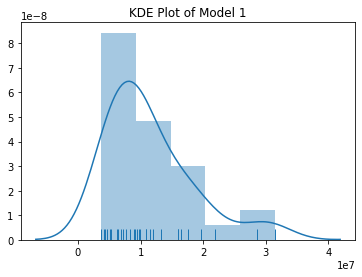

In [7]:
# Make sure MSE List is 30
print("Length of MSE:", len(MSE_List))

# Plot KDE of MSE
sns.distplot(MSE_List, kde=True, rug=True)
plt.title("KDE Plot of Model 1")

In [8]:
print("MSE:",MSE_List)

MSE: [28600797.696856506, 8240849.4790999945, 8948874.861558005, 16527225.723222345, 10927227.86331924, 9113236.652229724, 4155650.652863499, 7650907.31689811, 17578673.68821151, 7132521.154024166, 21808048.34046503, 9469298.423960943, 9821266.16878917, 12050079.688367976, 5085917.951045586, 4585606.482893937, 3729622.6721304874, 4281243.727033949, 31398648.718287833, 9728904.805168906, 19722388.564371593, 6340415.850903096, 5188624.992100214, 10802899.21357812, 15964666.022935858, 15900753.6766346, 6794670.095818016, 11454877.11374535, 13241601.650245754, 6288994.552721418]


#### Part ii

What is E[MSE] for this model? 

In [9]:
# From the 30 MSE Values
Expected_Value = np.average(MSE_List)
print("Expected Average:", Expected_Value)

# From MSE From the Ensemble Model
## Still an Insane Number
MSE_Ensemble_Model = mean_squared_error(predictions,Y.values)
print("Ensemble Model:", MSE_Ensemble_Model)

Expected Average: 11417816.459982699
Ensemble Model: 9240857.698518133


#### Part iii

Compute the variance for this model. 

In [10]:
# My variance of the model is calculated using the SCKLEARN Variance Calculation of model
# Since this model ran 30 times effectively. This is the average variance of each of the 30 models. 
Expected_Variance = np.average(Variance_List)
print("Expected Variance", Expected_Variance)

## Calculate the Variance Of Ensembe Model 
Variance_Ensemble_Model = explained_variance_score(predictions, Y.values)
print("Variance Ensemble Model:", Variance_Ensemble_Model)

Expected Variance 0.8312864773550594
Variance Ensemble Model: 0.833255028259325


#### Part iv

Find the (bias)^2 + noise variance for this model, assuming E[MSE] is a good approximation for MSE. 

In [11]:
# Calculate Using the Formula
## Value Needs to be Normalized  to make sense
bias_squared_noise_variance = Expected_Value - Expected_Variance
print("Bias^2 + Noise Variance:", bias_squared_noise_variance)

Bias^2 + Noise Variance: 11417815.628696222


#### Part v
What is your impression of the variance of this model versus the (bias)^2 + noise variance for this model? 

### Part B

The second model would be the least feature model. Meaning that for this model I would try to use the least amount of features. The features chosen are comming directly from correlation. So this model is at the very low range of the spectrum. And I am dropping features that did not show any correlation with price or anything else in the previous exercises.
price = curb-weight + horsepower + city-mpg

In [12]:
# We first set a new dataframe
Model = read_data()

# Create the X Variables in our model
X = Model[["curb-weight", "horsepower", "city-mpg"]]   

# Create the Y Variable in our model
Y = Model["price"]

# Set Up The K-Folds
K = 10
kf = KFold(n_splits=10, shuffle=True)

# Set Up Linear Regression
Linear_Model = LinearRegression()

MSE_List = []
Variance_List = []
Weights_List = []
Y_Coefficients = []
for i in range(3):
    for train_index, test_index in kf.split(X):
        # Split the Dataset
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        
        # Set Up Linear Regression Model
        Linear_Model.fit(x_train, y_train)
        
        # Linear Regression Coefficient
        Weights_List.append(Linear_Model.coef_)

        # Linear Regression Y Coefficient
        Y_Coefficients.append(Linear_Model.intercept_)
        
        # Linear Model Predict
        y_hat = Linear_Model.predict(x_test)
        
        # Calculate Variance of the whole model using the whole dataset
        y_hat2 = Linear_Model.predict(X)
        var_score = explained_variance_score(y_hat2, Y)
        Variance_List.append(var_score)
        
        ## Now I can calculate the MSE using Scikit Learning
        MSE = mean_squared_error(y_test, y_hat)
        MSE_List.append(MSE)

print("Variance List:", Variance_List)

Variance List: [0.7099892353631473, 0.7156290583928102, 0.7218780992278504, 0.7269831241090559, 0.7223258744048653, 0.7245683724409298, 0.6922145598036789, 0.7207047000173146, 0.7053467986612179, 0.720925637207632, 0.7214173486170347, 0.6988379923262313, 0.7288622896104977, 0.7176552970895798, 0.7081549639815768, 0.6909478141297047, 0.7290364772177111, 0.7217263968172647, 0.7127004790397269, 0.7281784947041863, 0.7129257058232497, 0.7114987827785402, 0.7162725026465652, 0.7033314830740218, 0.7311803660355404, 0.7340261440636914, 0.7176625491332256, 0.7038631794856325, 0.7204093983875637, 0.7115947432767338]


In [13]:
# Lets Arrange the Ensemble Model
print("Number of models:", len(Variance_List))

# Coefficient of Model
coefficients = np.mean(Weights_List, axis=0)
print("Coefficient of the Model")
print(coefficients)

# Y Coefficient
y_coefficient = np.mean(Y_Coefficients)
print("Y Coefficient", y_coefficient)

# Calculate Predictions
predictions = predict(X.values, coefficients,y_coefficient)

Number of models: 30
Coefficient of the Model
[  8.85027151 110.29855193 220.45611328]
Y Coefficient -26385.651049920278


#### Part i

Plot a kernel density estimate for the mean square error (MSE) for this model? 

Length of MSE: 30
MSE List [22741190.700040463, 8341323.83680281, 8568296.77463116, 13829858.821480518, 12831966.006258367, 11878687.770570045, 29416526.061673697, 9887299.696701147, 27277060.0909376, 4936559.4140208205, 11169727.782572936, 14223203.085923772, 20464363.594401557, 8194439.325816451, 14872088.379526287, 24563789.539432857, 20016298.63056854, 14138421.895710468, 12673616.52899414, 11689065.347711982, 15513351.80139094, 16051801.282920867, 18380193.506200764, 21723652.147827677, 12825122.041806327, 13726112.914114943, 4672735.138698098, 25808779.752728697, 8409527.708666654, 10511889.97422775]


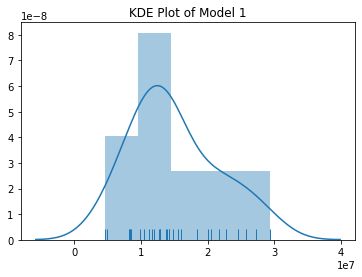

In [14]:
# Make sure MSE List is 30
print("Length of MSE:", len(MSE_List))

# Plot KDE of MSE
sns.distplot(MSE_List, kde=True, rug=True)
plt.title("KDE Plot of Model 1")

# Print MSE List
print("MSE List", MSE_List)

#### Part ii
What is E[MSE] for this model? 

In [15]:
# From the 30 MSE Values
Expected_Value = np.average(MSE_List)
print("Expected Average:", Expected_Value)

# From MSE From the Ensemble Model
## Still an Insane Number
MSE_Ensemble_Model = mean_squared_error(predictions,Y.values)
print("Ensemble Model:", MSE_Ensemble_Model)

Expected Average: 14977898.318411944
Ensemble Model: 14236373.77221117


#### Part iii
Compute the variance for this model.

In [16]:
# My variance of the model is calculated using the SCKLEARN Variance Calculation of model
# Since this model ran 30 times effectively. This is the average variance of each of the 30 models. 
Expected_Variance = np.average(Variance_List)
print("Expected Variance", Expected_Variance)

## Calculate the Variance Of Ensembe Model 
Variance_Ensemble_Model = explained_variance_score(predictions, Y.values)
print("Variance Ensemble Model:", Variance_Ensemble_Model)

Expected Variance 0.716028262262226
Variance Ensemble Model: 0.7168895076977153


#### Part iv
Find the (bias)^2 + noise variance for this model, assuming E[MSE] is a good approximation for MSE.

In [17]:
# Calculate Using the Formula
## Value Needs to be Normalized  to make sense
bias_squared_noise_variance = Expected_Value - Expected_Variance
print("Bias^2 + Noise Variance:", bias_squared_noise_variance)

Bias^2 + Noise Variance: 14977897.602383683


#### Part v¶
What is your impression of the variance of this model versus the (bias)^2 + noise variance for this model? 

### Part C
The third model would be a more balanced model. I would try to drop some features but include a few more that were in the medium correlation levels. This should be a more balanced model that is probably closer to what Lasso or PCA would tell me to do.

price = length + curb-weight + engine-size + horsepower + city-mpg + compression-ratio


The third model would be a more balanced model. I would try to drop some features but include a few more that were in the medium correlation levels. This should be a more balanced model that is probably closer to what Lasso or PCA would tell me to do.
price = length + curb-weight + engine-size + horsepower + city-mpg + compression-ratio

In [18]:
# We first set a new dataframe
Model = read_data()

# Create the X Variables in our model
X = Model[["length", "curb-weight", "engine-size", "horsepower", "city-mpg", "compression-ratio"]]

# Create the Y Variable in our model
Y = Model["price"]

K = 10
kf = KFold(n_splits=10, shuffle=True)

# Set Up Linear Regression
Linear_Model = LinearRegression()

MSE_List = []
Variance_List = []
Weights_List = []
Y_Coefficients = []
for i in range(3):
    for train_index, test_index in kf.split(X):
        # Split the Dataset
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        
        # Set Up Linear Regression Model
        Linear_Model.fit(x_train, y_train)
        
        # Linear Regression Coefficient
        Weights_List.append(Linear_Model.coef_)

        # Linear Regression Y Coefficient
        Y_Coefficients.append(Linear_Model.intercept_)
        
        # Linear Model Predict
        y_hat = Linear_Model.predict(x_test)
        
        # Calculate Variance of the whole model using the whole dataset
        y_hat2 = Linear_Model.predict(X)
        var_score = explained_variance_score(y_hat2, Y)
        Variance_List.append(var_score)
        
        ## Now I can calculate the MSE using Scikit Learning
        MSE = mean_squared_error(y_test, y_hat)
        MSE_List.append(MSE)

print("Variance List:", Variance_List)

Variance List: [0.7842356394438084, 0.8010188428823735, 0.7855931358648746, 0.7840344177652316, 0.790694822273487, 0.7820500032048475, 0.7948350665793161, 0.7758801107919909, 0.7902195112342134, 0.7880218638134029, 0.77772794407883, 0.7931778446071105, 0.7927980316445927, 0.7876080108597253, 0.7835452913096006, 0.7806258573875025, 0.788817591783268, 0.8040422761259247, 0.7861262345083709, 0.7787681104306965, 0.7959973793100539, 0.7833268266927073, 0.7907394311280949, 0.7712263788944407, 0.7901371593965788, 0.7829551841738638, 0.7858972421176487, 0.7928409143712467, 0.7913006234409483, 0.7898928910761481]


In [19]:
# Lets Arrange the Ensemble Model
print("Number of models:", len(Variance_List))

# Coefficient of Model
coefficients = np.mean(Weights_List, axis=0)
print("Coefficient of the Model")
print(coefficients)

# Y Coefficient
y_coefficient = np.mean(Y_Coefficients)
print("Y Coefficient", y_coefficient)

# Calculate Predictions
predictions = predict(X.values, coefficients,y_coefficient)

Number of models: 30
Coefficient of the Model
[ 38.78493754   1.66544629 101.12915003  53.13483775 -38.90716554
 186.57191441]
Y Coefficient -17115.549288940572


#### Part i
Plot a kernel density estimate for the mean square error (MSE) for this model? 

Length of MSE: 30
MSE List [9762129.622294541, 12730649.408674859, 18462118.334483206, 11046406.730986906, 10149603.007768983, 15430892.053089136, 14648402.105001355, 18364625.15094428, 8942880.399114344, 4114900.2870087554, 23214034.85728061, 8777495.19694696, 11972238.946807198, 4608546.042222576, 11385324.7811541, 11028800.775884587, 5314215.701633425, 19260773.240362797, 4082380.510710881, 26789044.71389684, 12803597.107104655, 8658402.521859046, 5204579.385121449, 21431149.18874717, 14780116.279988881, 11682291.325689984, 5495640.885869761, 8799935.511528626, 14010204.139983842, 19739794.12989521]


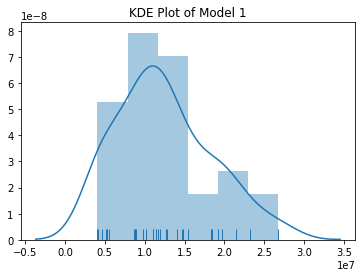

In [20]:
# Make sure MSE List is 30
print("Length of MSE:", len(MSE_List))

# Plot KDE of MSE
sns.distplot(MSE_List, kde=True, rug=True)
plt.title("KDE Plot of Model 1")

# Print MSE List
print("MSE List", MSE_List)

#### Part ii
What is E[MSE] for this model? 

In [21]:
# From the 30 MSE Values
Expected_Value = np.average(MSE_List)
print("Expected Average:", Expected_Value)

# From MSE From the Ensemble Model
## Still an Insane Number
MSE_Ensemble_Model = mean_squared_error(predictions,Y.values)
print("Ensemble Model:", MSE_Ensemble_Model)

Expected Average: 12423039.078068499
Ensemble Model: 11274859.636667736


#### Part iii
Compute the variance for this model.

In [22]:
# My variance of the model is calculated using the SCKLEARN Variance Calculation of model
# Since this model ran 30 times effectively. This is the average variance of each of the 30 models. 
Expected_Variance = np.average(Variance_List)
print("Expected Variance", Expected_Variance)

## Calculate the Variance Of Ensembe Model 
Variance_Ensemble_Model = explained_variance_score(predictions, Y.values)
print("Variance Ensemble Model:", Variance_Ensemble_Model)

Expected Variance 0.78747115457303
Variance Ensemble Model: 0.7885560803690719


#### Part iv
Find the (bias)^2 + noise variance for this model, assuming E[MSE] is a good approximation for MSE.

In [23]:
# Calculate Using the Formula
## Value Needs to be Normalized  to make sense
bias_squared_noise_variance = Expected_Value - Expected_Variance
print("Bias^2 + Noise Variance:", bias_squared_noise_variance)

Bias^2 + Noise Variance: 12423038.290597344


#### Part v
What is your impression of the variance of this model versus the (bias)^2 + noise variance for this model? 

## Problem 2

### Part A

The first model I propose is a sort of null model. Basically a model running all of the 13 features. With this model I can establish a baseline to compare the performance of models with smaller features.

price = wheel-base + length + width + height + curb-weight + engine-size + bore + stroke + compression-ratio + horsepower + peak-rpm + city-mpg + highway-mpg

In [24]:
# We first set a new dataframe
Model = read_data()
Model2 = read_data()

# Create the X Variables in our model
X = Model[["wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke",
          "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]]    
X2 = Model2[["wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke",
          "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]]    

print("Shape of X:",X.shape)

# Create the Y Variable in our model
Y = Model["price"]
Y2 = Model2["price"]


# Set Up The K-Folds
K = 10
kf = KFold(n_splits=10, shuffle=True)

MSE_List = []
Variance_List = []
Weights_List = []
Y_Coefficients = []
Weights_List = []
Y_Coefficients = []
for i in range(3):
    for train_index, test_index in kf.split(X):
        # Split the Dataset
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        # Turn values into tensors
        X_train_tensor = torch.tensor(x_train.values)
        X_test_tensor = torch.tensor(x_test.values)
        Y_train_tensor = torch.tensor(y_train.values).reshape(-1, 1)
        Y_test_tensor = torch.tensor(y_test.values).reshape(-1,1)

        # Set up the Model
        Num_Features = X.shape[1]  # takes variable 'x'
        outputDim = 1  # takes variable 'y'
        learningRate = 0.0001
        epochs = 2000

        model = linearRegression(Num_Features)
        criterion = torch.nn.L1Loss()
        #criterion = torch.nn.MSELoss(reduction='mean')
        optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

        # Run through the model
        for j in range(epochs):
            # Clear Gradients
            optimizer.zero_grad()
            # Run Model
            outputs = model.forward(X_train_tensor.float())
            # Get Lost for Predicted Output
            loss = criterion(outputs, Y_train_tensor.float())
            # Backward Propogation
            loss.backward()
            # Update Parameters
            optimizer.step()
        
        # Test Prediction of the Model
        optimizer.zero_grad()
        y_hat = model(X_test_tensor.float())
        # Calculate MSE
        ## Convert to Numpy
        y_hat = y_hat.detach().numpy()
        Y_test_tensor = Y_test_tensor.numpy()
        
        # Calculate the Variance for each model
        Y2_tensor = torch.tensor(Y2.values)                                           # Turn X Dataframe to Tensors
        X2_tensor =torch.tensor(X2.values)                                            # Turn Y Dataframe to Tensors
        y_hat2 = model(X2_tensor.float())                                             # Calculate Prediction
        var_score = explained_variance_score(y_hat2.detach().numpy(), Y2_tensor)
        Variance_List.append(var_score)
        
        ## Now I can calculate the MSE using Scikit Learning
        MSE = mean_squared_error(Y_test_tensor, y_hat)
        MSE_List.append(MSE)

        w = list(model.parameters())
        #print(w.detach())
        #for param in model.parameters():
        Weights_List.append(w[0].detach().numpy())
        Y_Coefficients.append(w[1].detach().numpy())
        
print(MSE_List)


Shape of X: (195, 13)
[20385206.97952615, 13810179.049228573, 28524520.333200503, 32313540.61318612, 39059232.69870677, 8355544.5444732085, 6797306.669246472, 42752181.22698901, 69690705.2845834, 8240886.279845141, 33658025.85399933, 41982176.75705383, 14875954.111363947, 27597200.120437242, 7719659.125580025, 22425380.62324569, 46596858.11284582, 29028109.15229545, 33413368.83677402, 13268600.524981435, 38507427.47064556, 37109643.40205989, 23665538.595508326, 42274424.218062624, 15556453.917538786, 7299628.231394855, 5152716.799023114, 30138959.270879358, 59769700.58778491, 8265272.322214365]


In [25]:
# Coefficient of Model
coefficients = np.mean(Weights_List, axis=0)
print("Coefficient of the Ensemble Model")
print(coefficients)

# Y Coefficient
y_coefficient = np.mean(Y_Coefficients)
print("Y Coefficient", y_coefficient)

# Calculate Predictions
predictions = predict(X.values, coefficients.T, y_coefficient)

# First Five Value Prediction Comparison
for k in range(5):
    print("Actual:", Y2[k], "Prediction:",predictions[k])

Coefficient of the Ensemble Model
[[-4.7261077e-01 -7.4929351e-01 -2.7723294e-01 -3.6454222e-01
   8.6266031e+00  1.5280875e+00 -7.9241088e-03 -2.4023162e-02
  -8.6865276e-02  2.2356567e+00 -1.9352664e+00 -4.6519822e-01
  -6.1374086e-01]]
Y Coefficient 0.03898952
Actual: 13495.0 Prediction: [12519.97296854]
Actual: 16500.0 Prediction: [12519.97296854]
Actual: 16500.0 Prediction: [15017.28422598]
Actual: 13950.0 Prediction: [9662.85211119]
Actual: 17450.0 Prediction: [13942.33817829]


#### Part i

Plot a kernel density estimate for the mean square error (MSE) for this model. (Each fold yields an estimate of MSE; find the kernel density estimate using the 30 samples of MSE)

Length of MSE: 30


Text(0.5, 1.0, 'KDE Plot of Model 1')

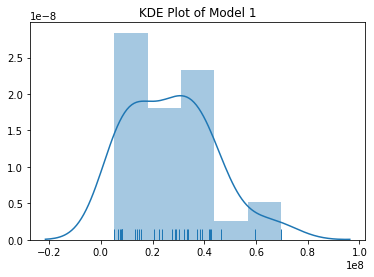

In [26]:
# Make sure MSE List is 30
print("Length of MSE:", len(MSE_List))

# Plot KDE of MSE
sns.distplot(MSE_List, kde=True, rug=True)
plt.title("KDE Plot of Model 1")

#### Part ii

What is E[MSE] for this model?

In [27]:
# From the 30 MSE Values
Expected_Value = np.average(MSE_List)
print("Expected Average:", Expected_Value)

# From MSE From the Ensemble Model
## Still an Insane Number
MSE_Ensemble_Model = mean_squared_error(predictions,Y.values)
print("Ensemble Model:", MSE_Ensemble_Model)

Expected Average: 26941146.7237558
Ensemble Model: 25731049.057616536


#### Part iii

Compute the variance for this model? 

In [28]:
# My variance of the model is calculated using the SCKLEARN Variance Calculation of model
# Since this model ran 30 times effectively. This is the average variance of each of the 30 models. 
Expected_Variance = np.average(Variance_List)
print("Expected Variance", Expected_Variance)

## Calculate the Variance Of Ensembe Model 
Variance_Ensemble_Model = explained_variance_score(predictions, Y.values)
print("Variance Ensemble Model:", Variance_Ensemble_Model)

Expected Variance -0.03418083820164682
Variance Ensemble Model: -0.019239659800054598


#### Part iv
Find the (bias)^2 + noise variance for this model, assuming E[MSE] is a good approximation for MSE. 

In [29]:
# Calculate Using the Formula
## Value Needs to be Normalized  to make sense
bias_squared_noise_variance = Expected_Value - Expected_Variance
print("Bias^2 + Noise Variance:", bias_squared_noise_variance)

Bias^2 + Noise Variance: 26941146.757936638


### Part B

The second model would be the least feature model. Meaning that for this model I would try to use the least amount of features. The features chosen are comming directly from correlation. So this model is at the very low range of the spectrum. And I am dropping features that did not show any correlation with price or anything else in the previous exercises.

price = curb-weight + horsepower + city-mpg

In [30]:
# We first set a new dataframe
Model = read_data()
Model2 = read_data()

# Create the X Variables in our model
X = Model[["wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke",
          "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]]    
X2 = Model2[["wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke",
          "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]]    

print("Shape of X:",X.shape)

# Create the Y Variable in our model
Y = Model["price"]
Y2 = Model2["price"]


# Set Up The K-Folds
K = 10
kf = KFold(n_splits=10, shuffle=True)

MSE_List = []
Variance_List = []
Weights_List = []
Y_Coefficients = []
Weights_List = []
Y_Coefficients = []
for i in range(3):
    for train_index, test_index in kf.split(X):
        # Split the Dataset
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        # Turn values into tensors
        X_train_tensor = torch.tensor(x_train.values)
        X_test_tensor = torch.tensor(x_test.values)
        Y_train_tensor = torch.tensor(y_train.values).reshape(-1, 1)
        Y_test_tensor = torch.tensor(y_test.values).reshape(-1,1)

        # Set up the Model
        Num_Features = X.shape[1]  # takes variable 'x'
        outputDim = 1  # takes variable 'y'
        learningRate = 0.0001
        epochs = 2000

        model = linearRegression(Num_Features)
        criterion = torch.nn.L1Loss()
        #criterion = torch.nn.MSELoss(reduction='mean')
        optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

        # Run through the model
        for j in range(epochs):
            # Clear Gradients
            optimizer.zero_grad()
            # Run Model
            outputs = model.forward(X_train_tensor.float())
            # Get Lost for Predicted Output
            loss = criterion(outputs, Y_train_tensor.float())
            # Backward Propogation
            loss.backward()
            # Update Parameters
            optimizer.step()
        
        # Test Prediction of the Model
        optimizer.zero_grad()
        y_hat = model(X_test_tensor.float())
        # Calculate MSE
        ## Convert to Numpy
        y_hat = y_hat.detach().numpy()
        Y_test_tensor = Y_test_tensor.numpy()
        
        # Calculate the Variance for each model
        Y2_tensor = torch.tensor(Y2.values)                                           # Turn X Dataframe to Tensors
        X2_tensor =torch.tensor(X2.values)                                            # Turn Y Dataframe to Tensors
        y_hat2 = model(X2_tensor.float())                                             # Calculate Prediction
        var_score = explained_variance_score(y_hat2.detach().numpy(), Y2_tensor)
        Variance_List.append(var_score)
        
        ## Now I can calculate the MSE using Scikit Learning
        MSE = mean_squared_error(Y_test_tensor, y_hat)
        MSE_List.append(MSE)

        w = list(model.parameters())
        #print(w.detach())
        #for param in model.parameters():
        Weights_List.append(w[0].detach().numpy())
        Y_Coefficients.append(w[1].detach().numpy())
        
print(MSE_List)

Shape of X: (195, 13)
[24819662.678929806, 8032515.967555618, 53317103.91777744, 7814574.559152079, 15138647.886370588, 41834220.104977034, 80760474.68214412, 9010506.728088232, 12800246.646998484, 17579971.752212275, 11402865.00079441, 36230755.10439918, 21791136.892993055, 39212394.585660174, 25750451.05464654, 8183856.820975366, 30557161.24469496, 38758471.77667959, 24777350.96418855, 25366340.502504136, 32399908.611308385, 6524401.2465815665, 31457754.877616454, 16536593.846575523, 38715985.28740911, 21656648.14909024, 6359835.570629622, 19684113.388577826, 34953579.962031804, 52416485.08135557]


In [31]:
# Coefficient of Model
coefficients = np.mean(Weights_List, axis=0)
print("Coefficient of the Ensemble Model")
print(coefficients)

# Y Coefficient
y_coefficient = np.mean(Y_Coefficients)
print("Y Coefficient", y_coefficient)

# Calculate Predictions
predictions = predict(X.values, coefficients.T, y_coefficient)

# First Five Value Prediction Comparison
for k in range(5):
    print("Actual:", Y2[k], "Prediction:",predictions[k])

Coefficient of the Ensemble Model
[[-0.5374839  -0.74917644 -0.3295651  -0.3933755   8.636754    1.4992182
  -0.02352462 -0.04160363 -0.12714592  2.1866925  -1.9394071  -0.5205739
  -0.5748857 ]]
Y Coefficient 0.008302014
Actual: 13495.0 Prediction: [12504.84795889]
Actual: 16500.0 Prediction: [12504.84795889]
Actual: 16500.0 Prediction: [15001.72092616]
Actual: 13950.0 Prediction: [9643.46954712]
Actual: 17450.0 Prediction: [13926.60055856]


#### Part i
Plot a kernel density estimate for the mean square error (MSE) for this model. (Each fold yields an estimate of MSE; find the kernel density estimate using the 30 samples of MSE)

Length of MSE: 30


Text(0.5, 1.0, 'KDE Plot of Model 2')

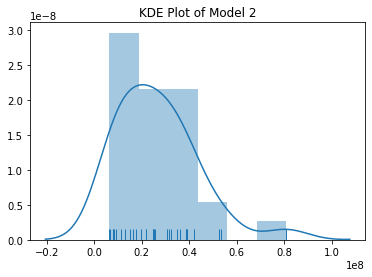

In [32]:
# Make sure MSE List is 30
print("Length of MSE:", len(MSE_List))

# Plot KDE of MSE
sns.distplot(MSE_List, kde=True, rug=True)
plt.title("KDE Plot of Model 2")

#### Part ii
What is E[MSE] for this model?

In [33]:
# From the 30 MSE Values
Expected_Value = np.average(MSE_List)
print("Expected Average:", Expected_Value)

# From MSE From the Ensemble Model
## Still an Insane Number
MSE_Ensemble_Model = mean_squared_error(predictions,Y.values)
print("Ensemble Model:", MSE_Ensemble_Model)

Expected Average: 26461467.16309726
Ensemble Model: 25763236.733351726


#### Part iii
Compute the variance for this model? 

In [34]:
# My variance of the model is calculated using the SCKLEARN Variance Calculation of model
# Since this model ran 30 times effectively. This is the average variance of each of the 30 models. 
Expected_Variance = np.average(Variance_List)
print("Expected Variance", Expected_Variance)

## Calculate the Variance Of Ensembe Model 
Variance_Ensemble_Model = explained_variance_score(predictions, Y.values)
print("Variance Ensemble Model:", Variance_Ensemble_Model)

Expected Variance -0.02656810123163308
Variance Ensemble Model: -0.018034537575002396


#### Part iv
Find the (bias)^2 + noise variance for this model, assuming E[MSE] is a good approximation for MSE. 

In [35]:
# Calculate Using the Formula
## Value Needs to be Normalized  to make sense
bias_squared_noise_variance = Expected_Value - Expected_Variance
print("Bias^2 + Noise Variance:", bias_squared_noise_variance)

Bias^2 + Noise Variance: 26461467.18966536


### Part C

The third model would be a more balanced model. I would try to drop some features but include a few more that were in the medium correlation levels. This should be a more balanced model that is probably closer to what Lasso or PCA would tell me to do.

price = length + curb-weight + engine-size + horsepower + city-mpg + compression-ratio

In [36]:
# We first set a new dataframe
Model = read_data()
Model2 = read_data()

# Create the X Variables in our model
X = Model[["wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke",
          "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]]    
X2 = Model2[["wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke",
          "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]]    

print("Shape of X:",X.shape)

# Create the Y Variable in our model
Y = Model["price"]
Y2 = Model2["price"]


# Set Up The K-Folds
K = 10
kf = KFold(n_splits=10, shuffle=True)

MSE_List = []
Variance_List = []
Weights_List = []
Y_Coefficients = []
Weights_List = []
Y_Coefficients = []
for i in range(3):
    for train_index, test_index in kf.split(X):
        # Split the Dataset
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        # Turn values into tensors
        X_train_tensor = torch.tensor(x_train.values)
        X_test_tensor = torch.tensor(x_test.values)
        Y_train_tensor = torch.tensor(y_train.values).reshape(-1, 1)
        Y_test_tensor = torch.tensor(y_test.values).reshape(-1,1)

        # Set up the Model
        Num_Features = X.shape[1]  # takes variable 'x'
        outputDim = 1  # takes variable 'y'
        learningRate = 0.0001
        epochs = 2000

        model = linearRegression(Num_Features)
        criterion = torch.nn.L1Loss()
        #criterion = torch.nn.MSELoss(reduction='mean')
        optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

        # Run through the model
        for j in range(epochs):
            # Clear Gradients
            optimizer.zero_grad()
            # Run Model
            outputs = model.forward(X_train_tensor.float())
            # Get Lost for Predicted Output
            loss = criterion(outputs, Y_train_tensor.float())
            # Backward Propogation
            loss.backward()
            # Update Parameters
            optimizer.step()
        
        # Test Prediction of the Model
        optimizer.zero_grad()
        y_hat = model(X_test_tensor.float())
        # Calculate MSE
        ## Convert to Numpy
        y_hat = y_hat.detach().numpy()
        Y_test_tensor = Y_test_tensor.numpy()
        
        # Calculate the Variance for each model
        Y2_tensor = torch.tensor(Y2.values)                                           # Turn X Dataframe to Tensors
        X2_tensor =torch.tensor(X2.values)                                            # Turn Y Dataframe to Tensors
        y_hat2 = model(X2_tensor.float())                                             # Calculate Prediction
        var_score = explained_variance_score(y_hat2.detach().numpy(), Y2_tensor)
        Variance_List.append(var_score)
        
        ## Now I can calculate the MSE using Scikit Learning
        MSE = mean_squared_error(Y_test_tensor, y_hat)
        MSE_List.append(MSE)

        w = list(model.parameters())
        #print(w.detach())
        #for param in model.parameters():
        Weights_List.append(w[0].detach().numpy())
        Y_Coefficients.append(w[1].detach().numpy())
        
print(MSE_List)

Shape of X: (195, 13)
[30938792.470775794, 9206610.216894269, 49376177.99948349, 4253875.8600485325, 40401362.86277952, 57755035.87686509, 17490336.02542468, 7364826.91906274, 13411393.206403444, 34026409.557255745, 28246206.39927392, 9998012.623349333, 47116266.679944515, 58603236.604019165, 15893157.845940912, 11315566.78682479, 12407814.496242363, 64647878.51490726, 6311571.325842757, 12486910.39567084, 13661366.96414876, 37121902.217785574, 15992812.143560732, 29430383.59765439, 36841330.867939815, 28874551.876119625, 44589570.62195084, 18440636.461155955, 31548531.63829609, 8337730.02202747]


In [37]:
# Coefficient of Model
coefficients = np.mean(Weights_List, axis=0)
print("Coefficient of the Ensemble Model")
print(coefficients)

# Y Coefficient
y_coefficient = np.mean(Y_Coefficients)
print("Y Coefficient", y_coefficient)

# Calculate Predictions
predictions = predict(X.values, coefficients.T, y_coefficient)

# First Five Value Prediction Comparison
for k in range(5):
    print("Actual:", Y2[k], "Prediction:",predictions[k])

Coefficient of the Ensemble Model
[[-0.5061611  -0.82475567 -0.3286588  -0.34797576  8.6537895   1.4539413
   0.03817628 -0.01162591 -0.12923048  2.2200487  -1.94353    -0.5090639
  -0.59171426]]
Y Coefficient -0.025810922
Actual: 13495.0 Prediction: [12517.77658365]
Actual: 16500.0 Prediction: [12517.77658365]
Actual: 16500.0 Prediction: [15019.90940318]
Actual: 13950.0 Prediction: [9651.39203329]
Actual: 17450.0 Prediction: [13942.08786978]


#### Part i

Plot a kernel density estimate for the mean square error (MSE) for this model. (Each fold yields an estimate of MSE; find the kernel density estimate using the 30 samples of MSE)

Length of MSE: 30


Text(0.5, 1.0, 'KDE Plot of Model 3')

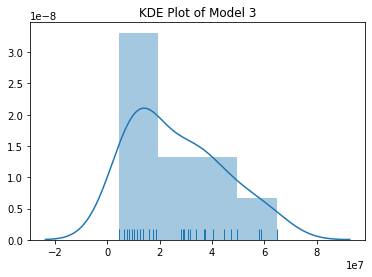

In [38]:
# Make sure MSE List is 30
print("Length of MSE:", len(MSE_List))

# Plot KDE of MSE
sns.distplot(MSE_List, kde=True, rug=True)
plt.title("KDE Plot of Model 3")

#### Part ii

What is E[MSE] for this model?

In [39]:
# From the 30 MSE Values
Expected_Value = np.average(MSE_List)
print("Expected Average:", Expected_Value)

# From MSE From the Ensemble Model
## Still an Insane Number
MSE_Ensemble_Model = mean_squared_error(predictions,Y.values)
print("Ensemble Model:", MSE_Ensemble_Model)

Expected Average: 26536341.969254956
Ensemble Model: 25718973.233390264


#### Part iii

Compute the variance for this model? 

In [40]:
# My variance of the model is calculated using the SCKLEARN Variance Calculation of model
# Since this model ran 30 times effectively. This is the average variance of each of the 30 models. 
Expected_Variance = np.average(Variance_List)
print("Expected Variance", Expected_Variance)

## Calculate the Variance Of Ensembe Model 
Variance_Ensemble_Model = explained_variance_score(predictions, Y.values)
print("Variance Ensemble Model:", Variance_Ensemble_Model)

Expected Variance -0.023343886390327768
Variance Ensemble Model: -0.013716682430202853


#### Part iv

Find the (bias)^2 + noise variance for this model, assuming E[MSE] is a good approximation for MSE. 

In [41]:
# Calculate Using the Formula
## Value Needs to be Normalized  to make sense
bias_squared_noise_variance = Expected_Value - Expected_Variance
print("Bias^2 + Noise Variance:", bias_squared_noise_variance)

Bias^2 + Noise Variance: 26536341.992598843
